<img src = 'imagens/logo.jpg'>

# <center><span style = "font-family:Times New Roman"><font color = #0f4e8c>Regressões Regularizadas

Nesta aula vamos falar sobre Regressões Regularizadas, em especial, as regressões regularizadas **Lasso** e **Ridge**.

Antes de começarmos, precisamos falar sobre alguns pontos que são chave para compreender o funcionamento e aplicações das regressões regularizadas.

## <span style = "font-family:Times New Roman"><font color = #0f4e8c>1. Sobreajuste, Subajuste e Complexidade

Uma das características mais importantes de um modelo de machine learning é a sua capacidade de **generalização**, em outras palavras, a capacidade de fazer boas previsões com dados inéditos.

Normalmente modelos são incapazes de generalizar por dois motivos:
1. Não se ajustaram bem aos dados de treino;
2. Se ajustaram demais aos dados de treino

O primeiro caso é chamado de <font color = #0f4e8c>*Subajuste*<font color = 'black'>, o segundo de <font color = #0f4e8c>*Sobreajuste*<font color = 'black'>.

Como vocês viram na última aula, devemos separar os dados em dois conjuntos: de **treino** e de **teste**. O <font color = #0f4e8c>**Sobreajuste**<font color = 'black'> ocorre quando o modelo "decora" o conjunto de treino.

Isso pode acontecer por vários motivos, um deles (e muito comum) é a *complexidade* dos modelos.

$\triangleright$ <font color = #ACAF1F>***No contexto da Regresssão Linear, a complexidade do modelo é definida pelo número de variáveis preditoras.***

$\triangleright$ <font color = #ACAF1F>***Em Árvores de Decisão, está ligada à profundidade da árvore. Em modelos de Vizinhos Próximos, ao número de vizinhos.***

Modelos muito complexos tendem a capturar informações irrelevantes, porém específicas, do conjunto de treino (*noise*, ou *ruído*). Isso faz com que a performance deles no conjunto de treino seja elevada. Quando estes modelos são alimentados com dados inéditos (conjunto de  teste), observamos uma queda acentuada na performance.

<img src = 'imagens/model-over-fitting.png'>

<center><font size = 1>Imagem 1. IBM - Overfitting (https://1.cms.s81c.com/sites/default/files/2021-03-03/model-over-fitting.png)

A imagem acima exemplifica bem a ideia de sobreajuste e subajuste no contexto da classificação.

## <font color = #0f4e8c>2. Trade-off viés-variância

O trade-off entre viés e variância é um conceito de extrema importância para a ciência de dados, e um dos motivos pelos quais utilizamos métodos de regularização.

Olhando para a imagem 1, vemos que quando ocorre *subajuste* temos viés (*bias*) alto. No *sobreajuste*, por sua vez, temos variância (*variance*) alta. Para entendermos isso precisamos conceituar Viés, Variância e como eles se relacionam com o erro do modelo.

### <font color = #0f4e8c>2.1 Viés
---
O viés é a diferença entre o valor médio das previsões do modelo (valor esperado $E[\space ]$) e o valor real que estamos tentando prever.

Formalmente:

#### Viés $ = E[\hat{f}(x)] - f(x)$

Um modelo com viés alto não se ajusta bem aos dados de treino, levando ao *subajuste* $\rightarrow$ erro de treino e teste altos.

### <font color = #0f4e8c>2.2 Variância
---
A variância é a variabilidade das previsões do modelo.

Formalmente:
#### Variância $= E\left[(\hat{f}(x) - E[\hat{f}(x)])^2\right]$ 

Um modelo com variância alta se ajusta muito aos dados de treino, levando ao *sobreajuste* $\rightarrow$ erro de treino baixo e de teste alto.

Abaixo está uma imagem que ilustra como o viés e a variância impactam nas previsões do modelos.

<img src = 'imagens/bias-variance-tradeoff.jpg'>

[Imagem 2. Bias Variance Trade-off.](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418451/bias_vs_variance_swxhxx.jpg)


Podemos formalizar este comportamento olhando para o Erro Quadrático do modelo.

O erro do modelo pode ser definido como:

#### <center> $e =  E\left [(Y - \hat{f}(x))^2\right ]$

Podemos decompô-lo da seguinte maneira:
#### <center>$e = \left(E[\hat{f}(x)] - f(x)\right )^2 + E\left [(\hat{f}(x) - E[\hat{f}(x)])^2\right ] +\sigma_e^2 $

Voltando às definições de viés e variância, vemos que o erro é composto por três componentes:

### <center> $e = Vies^2 + Variancia + Erro\space Irredutível$

Modelos simples tendem a ter baixa variância e viés alto, levando ao subajuste. À medida que a complexidade do modelo aumenta, abrimos mão do viés e introduzimos variância ao modelo.

Este é o trade-off que existe entre viés e variância.

```
Ao diminuir o viés para aumentar o ajuste do modelo aos dados (evitar subajuste), nós introduzimos variância ao modelo, correndo o risco de construir um modelo sobreajustado aos dados de treino.
```

Para demonstrar demonstrar na prática estes conceitos e suas implicações, vamos utilizar o conjunto de dados Boston House Prices. O conjunto está disponível na biblioteca `mlxtend`, que usaremos para decompor o erro do modelo. Além disso, utilizaremos um algoritmo de Árvore de Decisão.

Escolhi este algoritmo porque ele permite que a complexidade do modelo seja controlada por meio de parâmetros definidos por nós.

No exemplo treinei 28 modelos de árvore de decisão, cada um menos complexo que o anterior. A biblioteca `mlxtend` calcula o MSE para cada um dos modelos o decompõem entre viés e variância. Estes valores foram armazenados em um DataFrame, que utilizei para construir este gráfico. 

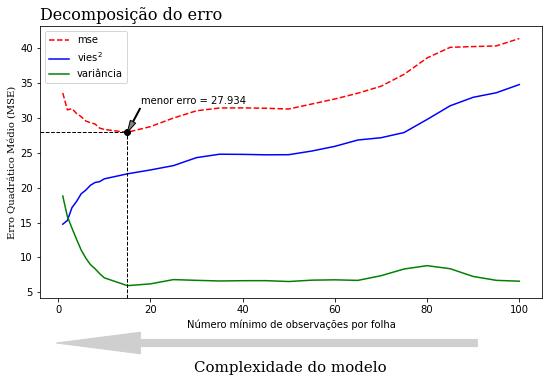

Nele, vemos que à medida em que o modelo fica mais complexo o viés (e o erro como um todo) diminui, indicando que o modelo está se ajustando melhor aos dados. Com 15 observações por folha temos nosso melhor modelo.

A partir deste ponto a variância passa a aumentar, levando o erro para cima. Isso indica que o modelo está se ajustando *demais* aos dados, ou seja, está sobreajustado.

---
Agora que entendemos como o viés e variância se relacionam entre si e com a complexidade do modelo, podemos entrar de fato nas regressões regularizadas. 

## <font color = #0f4e8c>3. <u>Regularização<u/>

*Regularização* é o nome dado ao conjunto de técnicas focadas em reduzir o sobreajuste em modelos de aprendizado de máquina.

De uma maneira simples, ela consiste em introduzir viés ao modelo de forma que a sua variância diminua.

Existem várias técnicas de regularização, nesta aula vamos falar sobre as regularizações $\ell_1$ e $\ell_2$.

## <font color = #0f4e8c>4. <u>Regressões Regularizadas

Em modelos de regressão linear, a complexidade do modelo é determinada pelo número de variáveis preditoras ($p$) do conjunto. 

À medida que $p$ se aproxima do número de observações ($n$), a variância do modelo tende ao infinito. Em outras palavras, quando temos muitas variáveis preditoras em nosso modelo seus coeficientes tendem a ser superestimados, levando ao sobreajuste.

Temos duas opções para contornar este problema:
1. Encolher os coeficientes das variáveis preditoras $p$;
2. Reduzir o número de $p$.

Independente do método escolhido, a regularização de regressões consiste em <font color = #0f4e8c>***adicionar um termo de <font color = 'red'>penalização<font color = #0f4e8c> à de função de custo da regressão.***

## <font color = #0f4e8c>4.1 <u>Regressão Ridge ($\ell_2$)

A regressão Ridge é utilizada quando queremos manter o número de variáveis preditoras, porém encolhendo seus coeficientes.

Ela também é chamada de <font color = #0f4e8c>*Regularização $\ell_2$*<font color = 'black'>, pois adiciona a *norma* $\ell_2$ dos coeficientes na função de custo para encolher os coeficientes da regressão:
 

### <center>$L_{linear}(\hat{\beta}) = RSS \implies L_{ridge}(\hat{\beta}) = RSS + \lambda \cdot\ell_2 \space \implies$ 

### <center>$L_{ridge}(\hat\beta) = RSS + \lambda\sum_{j=1}^{p}\beta_j^2 \implies$

### <center>$L_{ridge}(\hat\beta) = RSS + \lambda||\hat\beta||_2$

### <font color = 'red'>avaliar pertinência 

Abrindo a equação:

### <center>$L_{ridge}(\hat\beta) = \sum_{i=1}^{n}{\bigg(y_i - \hat\beta_0 - \sum_{j=1}^{p}({\hat\beta_j x_{ij})}\bigg)^2} + \lambda\sum_{j=1}^{p}{\hat{\beta}^{2}_{j}}$

O parâmetro $\lambda$ controla a força da regularização. Se este for 0, a função de custo será a $RSS$ e teremos um modelo de regressão linear comum. À medida em que $\lambda$ aumenta, as estimativas de $\beta$ diminuem. No limite, quando $\lambda$ tende ao infinito, $\beta$ tende a zero.
* $\lambda = 0 \implies RSS$
* $\lambda \rightarrow \infty, \space \hat\beta_{ridge} \rightarrow 0$

## <font color = #0f4e8c>4.1 <u>Regressão Lasso ($\ell_1$)

A regressão Lasso é muito parecida com a Ridge, sua única diferença é que a utilizamos a norma $\ell_1$ para controlar os coeficientes.

A sua função de custo é a seguinte:

### <center>$L_{lasso}(\hat\beta) = RSS + \lambda||\hat\beta||_1$

Abrindo a equação:

### <center>$L_{lasso}(\hat\beta) = \sum_{i=1}^{n}{\bigg(y_i - \hat\beta_0 - \sum_{j=1}^{p}({\hat\beta_j x_{ij})}\bigg)^2} + \lambda\sum_{j=1}^{p}|{\hat{\beta}_{j}}|$

Na regressão Ridge os coeficientes são encolhidos até próximo de zero, porém não atingem este valor. Isso muda na regressão Lasso.

Ao utilizarmos a norma $\ell_1$ ($|\hat\beta|$) os coeficientes $\beta$ menos importantes são zerados. Isso faz com que a regressão Lasso possa ser utilizada para selecionar atributos do modelo.

---

## <font color = #0f4e8c>5. <u>Aplicações com código

Agora que vimos a teoria por trás das regressões regularizadas, vamos ver seu comportamento na prática.

Vamos seguir o seguinte roteiro:
1. Pré-processamento;
    1. Imputação;
    2. Variáveis Dummy;
    3. Standartização
2. Modelagem e avaliação: Regressão Linear;
3. Modelagem e avaliação: Regressão Ridge;
4. Modelagem e avaliação: Regressão Lasso

Como o intuito desta aula é demonstrar o *funcionamento* das regressões regularizadas, não vamos nos estender nas etapas do pré-processamento. 

Tenham em mente, porém, que quando construirem modelos o pré-processando deve ser feito <font color = #EB1D1D>**após**<font color = 'black'> a <font color = #0B71E3>***análise exploratória***.
 
Além disso, não vamos fazer seleção de atributos nem feature engineering. 

<br>

O conjunto de dados utilizado será o mesmo da aula de regressão linear.

In [823]:
# importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [633]:
# carregando dados

df = pd.read_csv('dados\dados.csv')

In [634]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1051,20,RL,73.0,8993,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,176485.0
1,1094,20,RL,71.0,9230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,146000.0
2,662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000.0
3,1859,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Alloca,NaN
4,1370,20,RL,48.0,10635,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,232000.0


In [635]:
df.shape

(2919, 81)

In [ ]:
df.info()

In [637]:
# Excluindo coluna identificadora

df = df.drop(['Id', 'PoolQC'], axis = 1)

In [638]:
# Separando X e y

X = df.drop('SalePrice', axis = 1)
y = df[['SalePrice']]

In [739]:
# Separando amostras

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 13)

In [702]:
print(X_train.shape, X_test.shape)

(2043, 78) (876, 78)


<br>

## <font color = #0f4e8c> 1. Pré-processamento

### <font color = #0f4e8c>1.1 Imputação

In [721]:
# separando variáveis númericas e categóricas

num = X_train.select_dtypes(include = 'number').columns
obj = X_train.select_dtypes(include = 'object').columns

In [722]:
def null_count(cols, data):
    null_df = pd.DataFrame(data[cols].isnull().sum(), columns = ['contagem']).sort_values(by = 'contagem', ascending = False)
        
    return null_df

In [723]:
null_num = null_count(num, data = X_train)
null_obj = null_count(obj, data = X_train)

In [724]:
null_num.head(10)

,contagem
LotFrontage,343
GarageYrBlt,103
MasVnrArea,19
BsmtHalfBath,2
BsmtFullBath,2
TotalBsmtSF,1
GarageCars,1
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1


In [725]:
null_obj.head(10)

,contagem
MiscFeature,1970
Alley,1903
Fence,1631
FireplaceQu,994
GarageCond,103
GarageQual,103
GarageFinish,103
GarageType,101
BsmtExposure,60
BsmtCond,60


Para colunas numéricas, irei fazer a imputação com a mediana da coluna. Para as categóricas, com a moda.

In [726]:
# Função imputadora

def impute(data):
    cols = data.columns
    
    for col in cols:
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace = True)
        
        else:
            data[col].fillna(data[col].median(), inplace = True)
    return data

In [740]:
# imputando

impute(X_train)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1729,80,RL,70.0,10500,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,0,GdWo,Shed,0,12,2007,WD,Normal
581,20,RL,102.0,9373,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,0,MnPrv,Shed,0,5,2008,WD,Normal
351,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,Shed,0,12,2008,ConLD,Normal
197,60,RL,108.0,13418,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,Shed,0,10,2008,WD,Abnorml
986,20,RL,67.0,9808,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,Shed,0,3,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,20,RL,63.0,13072,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,Shed,0,5,2006,New,Partial
2790,20,RL,68.0,8638,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,Shed,0,10,2006,WD,Normal
74,30,RM,51.0,6120,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,Shed,0,1,2009,ConLw,Normal
2224,20,RL,108.0,12228,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,0,0,MnPrv,Shed,0,9,2006,New,Partial


In [728]:
null_count(num, data = X_train).head()

,contagem
MSSubClass,0
LotFrontage,0
BedroomAbvGr,0
KitchenAbvGr,0
TotRmsAbvGrd,0


In [729]:
null_count(obj, data = X_train).head()

,contagem
MSZoning,0
Functional,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinType2,0


### <font color = #0f4e8c>1.2 Transformação de variáveis categóricas

In [741]:
# Transformando as variáveis

encoder = OneHotEncoder(handle_unknown = 'ignore') 
dummies = pd.DataFrame(encoder.fit_transform(X_train[obj]).toarray(), index = X_train.index, dtype = int)
X_train = pd.concat([X_train.drop(obj, axis = 1), dummies], axis = 1)

In [742]:
X_train.shape

(2043, 283)

In [743]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,237,238,239,240,241,242,243,244,245,246
1729,80,70.0,10500,5,7,1971,2005,82.0,349.0,0.0,...,0,0,0,1,0,0,0,0,1,0
581,20,102.0,9373,5,6,1953,1953,84.0,500.0,196.0,...,0,0,0,1,0,0,0,0,1,0
351,160,24.0,2645,8,5,1999,2000,456.0,813.0,0.0,...,0,0,0,0,0,0,0,0,1,0
197,60,108.0,13418,9,5,2006,2006,270.0,1420.0,0.0,...,0,0,0,1,1,0,0,0,0,0
986,20,67.0,9808,7,5,2002,2002,110.0,788.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### <font color = #0f4e8c> 1.3 Standartização

In [744]:
# Instanciando objeto

scaler = MinMaxScaler()

In [745]:
X_train = scaler.fit_transform(X_train)

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


### <font color = #0f4e8c> 1.4 Refotaração

In [747]:
def preprocess(data):
    """ Função para encapsular processos de tratamento. """
    
    # imputação
    impute(data)
    
    # dummy
    ohe = OneHotEncoder(categories = encoder.categories_, handle_unknown = 'ignore')
    dummies = pd.DataFrame(ohe.fit_transform(data[obj],).toarray(), index = data.index, dtype = int)
    df_dummy = pd.concat([data.drop(obj, axis = 1), dummies], axis = 1)
    
    # standartização
    scaled_array = scaler.fit_transform(df_dummy)
    
    return scaled_array

In [748]:
# X_test

X_test = preprocess(X_test)

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [750]:
# y_train
# imputando
y_train = y_train.fillna(y_train.median())

# y_test
# imputando
y_test = y_test.fillna(y_test.median())

In [749]:
print(X_test.shape, y_test.shape)

(876, 283) (876, 1)


<br>

## <font color = #0f4e8c>2. Regressão Linear

In [817]:
# Instanciando o modelo
lin_model = LinearRegression()

# Fitando o modelo
lin_model.fit(X_train, y_train)

# Previsões
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)

### <font color = #0f4e8c>2.1 Avaliação

In [814]:
# importando módulos

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [818]:
# Métricas conjunto de treino

print(f'O R^2 do modelo no treino é de: {lin_model.score(X_train, y_train)}')
print(f'O erro quadrático médio do modelo no treino é de: {mse(y_train, y_pred_train)}')
print(f'O erro médio absoluto do modelo no treino é de: {mae(y_train, y_pred_train)}')

O R^2 do modelo no treino é de: 0.5147170710938295
O erro quadrático médio do modelo no treino é de: 1581276958.6857562
O erro médio absoluto do modelo no treino é de: 27338.913852178168


In [819]:
# Métricas conjunto de teste

print(f'O R^2 do modelo no teste é de: {lin_model.score(X_test, y_test)}')
print(f'O erro quadrático médio do modelo no teste é de: {mse(y_test, y_pred_test)}')
print(f'O erro médio absoluto do modelo no teste é de: {mae(y_test, y_pred_test)}')

O R^2 do modelo no teste é de: -9.736022447233201e+19
O erro quadrático médio do modelo no teste é de: 3.094192757990054e+29
O erro médio absoluto do modelo no teste é de: 456855701633192.06


Podemos ver que todas as métricas pioram drasticamente quando alimentamos o modelo com dados inéditos. Isso é um grande indicativo de que o modelo está <font color = #0f4e8c>**sobreajustado**.

In [905]:
ridgecv = RidgeCV(alphas = np.logspace(-3,6,9), cv = 10)

ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.33352143e-02, 1.77827941e-01, 2.37137371e+00,
       3.16227766e+01, 4.21696503e+02, 5.62341325e+03, 7.49894209e+04,
       1.00000000e+06]),
        cv=10)

In [906]:
alpha = ridgecv.alpha_

In [907]:
ridge = Ridge(alpha = alpha)

In [908]:
ridge.fit(X_train, y_train)

Ridge(alpha=31.622776601683793)

In [909]:
y_ridge_train = ridge.predict(X_train)
y_ridge_test = ridge.predict(X_test)

In [910]:
print(f'O R^2 do modelo no treino é de: {ridge.score(X_train, y_train)}')
print(f'O erro quadrático médio do modelo no treino é de: {mse(y_train, y_ridge_train)}')
print(f'O erro médio absoluto do modelo no treino é de: {mae(y_train, y_ridge_train)}')

O R^2 do modelo no treino é de: 0.45127605591610287
O erro quadrático médio do modelo no treino é de: 1787997223.423461
O erro médio absoluto do modelo no treino é de: 28508.641127931292


In [912]:
print(f'O R^2 do modelo no teste é de: {ridge.score(X_test, y_test)}')
print(f'O erro quadrático médio do modelo no teste é de: {mse(y_test, y_pred_test)}')
print(f'O erro médio absoluto do modelo no teste é de: {mae(y_test, y_pred_test)}')

O R^2 do modelo no teste é de: 0.3822339287001264
O erro quadrático médio do modelo no teste é de: 1973159531.110959
O erro médio absoluto do modelo no teste é de: 29353.822064351716


In [913]:
lassocv = LassoCV()

In [914]:
lasso = Lasso(alpha = 10)

lasso.fit(X_train, y_train)

y_lasso_train = lasso.predict(X_train)
y_lasso_test = lasso.predict(X_test)

In [810]:
print(f'O R^2 do modelo no treino é de: {lin_model.score(X_train, y_train)}')
print(f'O erro quadrático médio do modelo no treino é de: {mse(y_train, y_lasso_train)}')
print(f'O erro médio absoluto do modelo no treino é de: {mae(y_train, y_lasso_train)}')

O R^2 do modelo no treino é de: -3.964790201162572e+22
O erro quadrático médio do modelo no treino é de: 1591164935.5380015
O erro médio absoluto do modelo no treino é de: 27458.732027602353


In [811]:
print(f'O R^2 do modelo no teste é de: {lin_model.score(X_test, y_test)}')
print(f'O erro quadrático médio do modelo no teste é de: {mse(y_test, y_pred_test)}')
print(f'O erro médio absoluto do modelo no teste é de: {mae(y_test, y_pred_test)}')

O R^2 do modelo no teste é de: -9.693843226746185e+22
O erro quadrático médio do modelo no teste é de: 1942940096.2632678
O erro médio absoluto do modelo no teste é de: 29473.4190441658
